In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 10)  # in inches

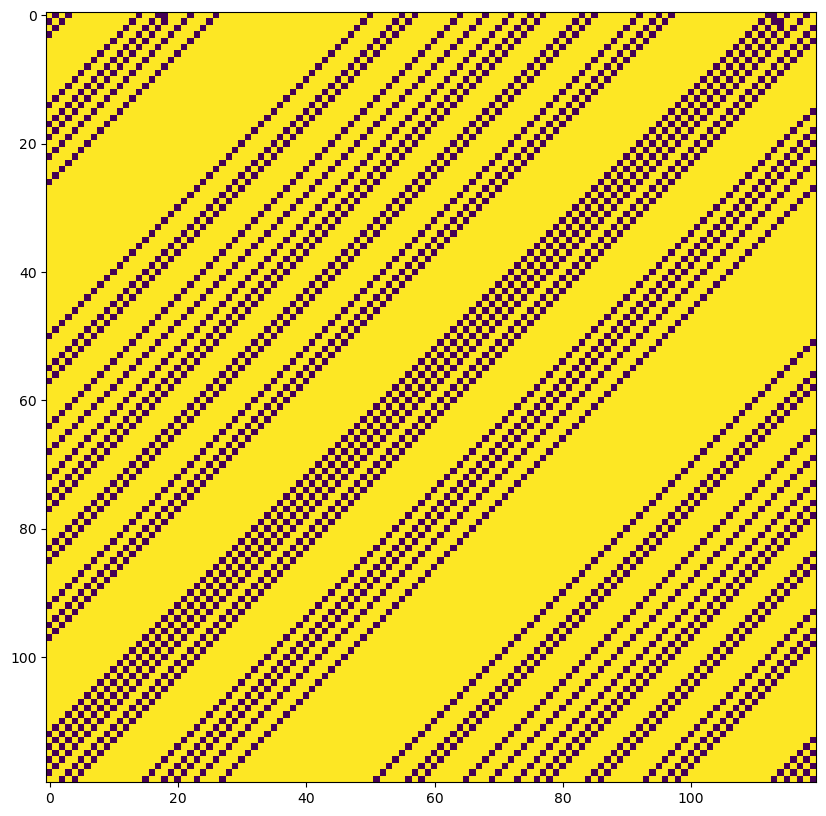

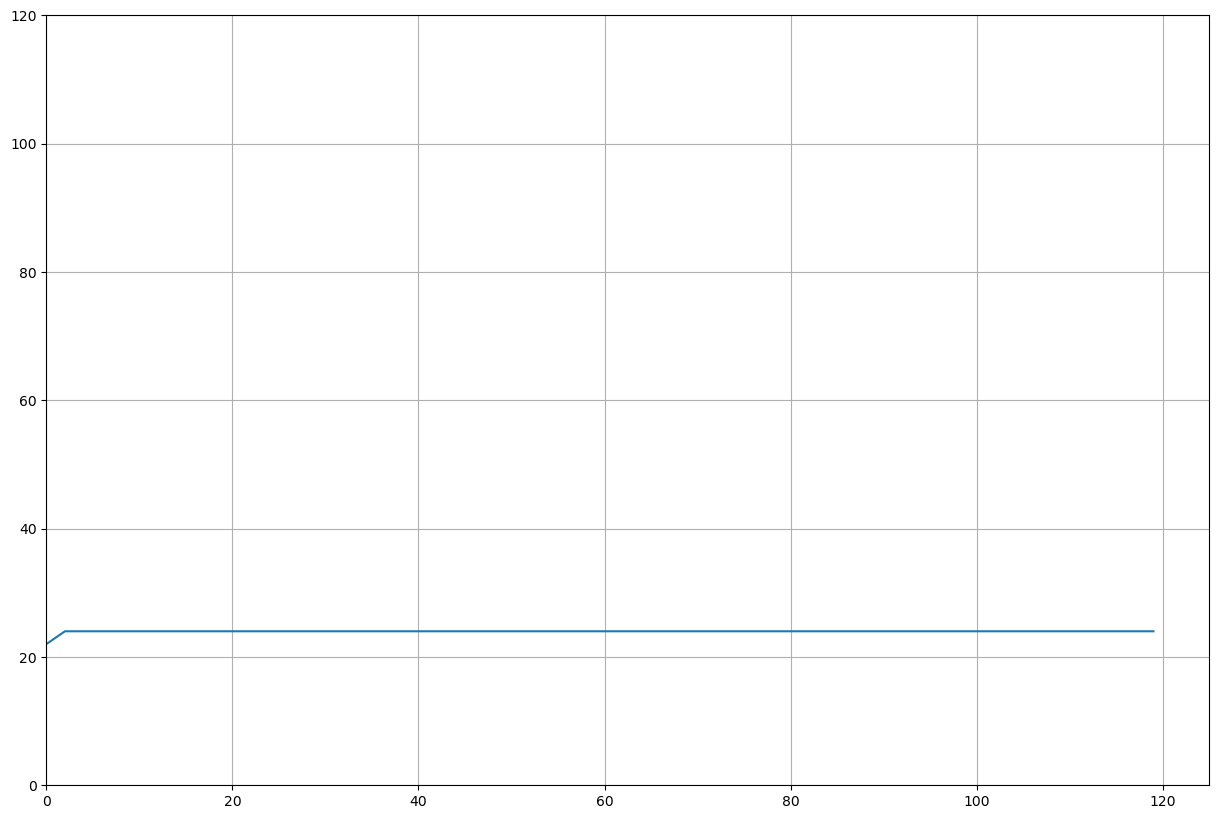

In [ ]:
boundary_condition = "periodic"

time = 120

def int_to_binary_array(number):
    if number < 0:
        raise ValueError("Only non-negative integers are supported for this conversion.")
    
    # Convert to binary string with leading zeros using f-string
    binary_string = f"{number:08b}"
    
    # Convert the binary string to a list of integers
    binary_array = [int(bit) for bit in binary_string[::-1]]
    
    return binary_array

def get_next_state(rule, index, arr, boundary_condition):
    neighbors = [0, 0, 0]
    if boundary_condition == "periodic":
        neighbors[0] = arr[index-1]
        neighbors[1] = arr[index]
        neighbors[2] = arr[(index+1)%np.size(arr)]
    elif boundary_condition == "reflective":
        neighbors[0] = arr[max(0, index-1)]
        neighbors[1] = arr[index]
        neighbors[2] = arr[min(np.size(arr)-1, index+1)]
    
    return rule(neighbors)

def rule_applier(neighbors):
    binary_string = "".join(map(str, neighbors))
    decimal_integer = int(binary_string, 2)
    return rule[decimal_integer]

def calculate_flow(row):
    amount = 0
    for i in range(len(row)):
        if row[i] == 1 and get_next_state(rule_applier, i, row, boundary_condition) == 0:
            amount += 1
    return amount

rule = int_to_binary_array(184)
seed_size = 120
seed_type = "random"

# 000 | 0
# 001 | 0
# 010 | 0
# 011 | 1
# 100 | 1
# 101 | 1
# 110 | 0
# 111 | 1
# 10111000 = 184

def get_grid_and_flows(density):
    seed = []
    if seed_type == "middle":
        seed = np.zeros(seed_size)
        seed[seed_size//2] = 1
    elif seed_type == "left":
        seed = np.zeros(seed_size)
        seed[0] = 1
    elif seed_type == "right":
        seed = np.zeros(seed_size)
        seed[-1] = 1
    else:
        seed = np.random.choice([0, 1], seed_size, p=[1-density, density])
    all_arrays = np.empty((time, np.size(seed)), dtype='int')
    all_arrays[0] = seed

    for t in range(1, np.size(all_arrays, axis=0)):
        for x in range(np.size(all_arrays, axis=1)):
            all_arrays[t][x] = get_next_state(rule_applier, x, all_arrays[t-1], boundary_condition)

    flows = np.apply_along_axis(calculate_flow, 1, all_arrays)*density
    return (all_arrays, flows)

all_arrays, flows = get_grid_and_flows(0.8)

plt.imshow(all_arrays)
plt.show()
plt.plot(np.arange(time), flows)
plt.ylim(0, seed_size)
plt.xlim(left=0)
plt.grid()
plt.show()

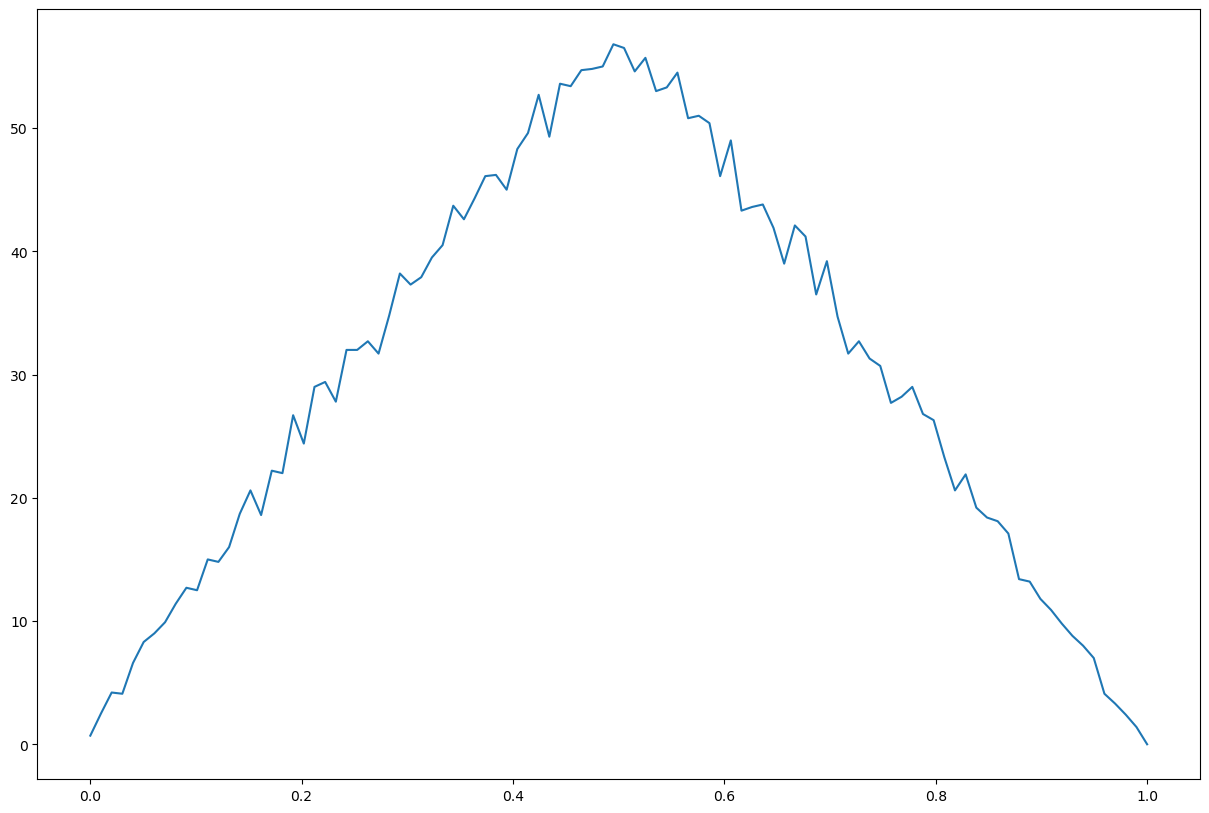

In [15]:
sims_to_run = 10
density_count = 100
last_flows = [0]*density_count
for i in range(1, density_count+1):
    averaged = 0
    for sim in range(sims_to_run):
        flows = get_grid_and_flows(i/density_count)[1]
        averaged += flows[-1]/sims_to_run
    last_flows[i-1] = averaged

plt.plot(np.linspace(0, 1, density_count), last_flows)
plt.show()